Now that the data is clean, it is helpful to do some exploratory data analysis. 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [63]:
fname = "../clean_data/opioid_data_indiana_2006-2016.csv" 
with open (fname) as f:
    df = pd.read_csv(f, )
df.head()

,Unnamed: 0,county,fips,state_abbrv,state,fips_state,year,population,prescription_rate,age_adjusted_mortality_range,avg_mortality_rate,change_mortality_rate,change_prescription_rate
0,693,"Adams, IN",18001,IN,Indiana,18,2006,33887,64.1,4-5.9,4.95,NaN,NaN
1,3442,"Adams, IN",18001,IN,Indiana,18,2007,33962,66.3,6-7.9,6.95,2.0,2.2
2,6185,"Adams, IN",18001,IN,Indiana,18,2008,34214,68.4,6-7.9,6.95,0.0,2.1
3,8939,"Adams, IN",18001,IN,Indiana,18,2009,34351,68.6,6-7.9,6.95,0.0,0.2
4,11681,"Adams, IN",18001,IN,Indiana,18,2010,34455,65.7,8-9.9,8.95,2.0,-2.9


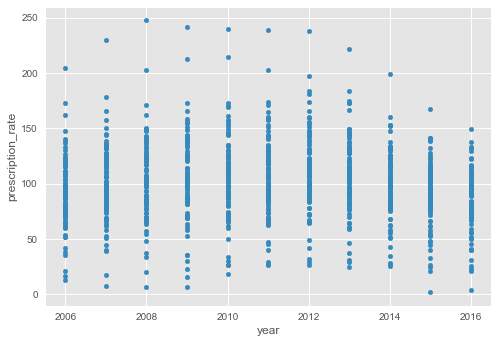

<Figure size 576x396 with 0 Axes>

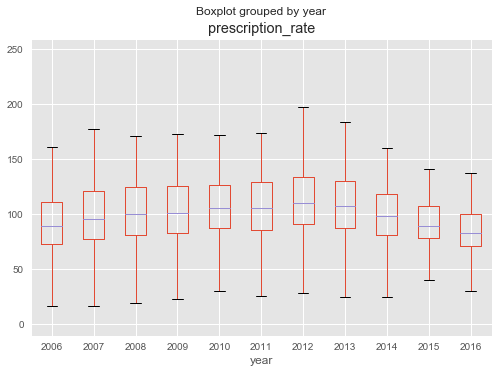

In [64]:
## Let's graph

df.plot(kind='scatter', x='year', y='prescription_rate')
plt.show()
plt.clf()
df.boxplot(by='year', column='prescription_rate')
plt.show()

In [13]:
year = df['year']
prescription = df['prescription_rate']
mortality = df['avg_mortality_rate']


In [37]:
annual_prescription= df.groupby('year')['prescription_rate'].mean().values
annual_mortality = df.groupby('year')['avg_mortality_rate'].mean()
tiny_year = df.year.unique()

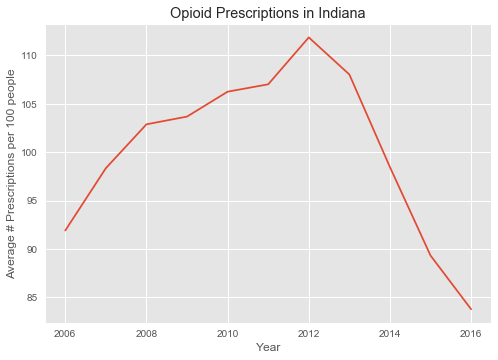

In [49]:
plt.clf()
plt.plot(tiny_year, annual_prescription)
plt.xlabel('Year')
plt.ylabel('Average # Prescriptions per 100 people')
plt.title('Opioid Prescriptions in Indiana')
plt.show()

It looks like there was a sharp decrease in opioid prescriptions in Indiana. After talking with Dr. Kosali Simon, this was due to a reformulation of the drug around this time. Given that this was the height of the prescription time period, this will be an area where I want to identify klusters of opioid use using k-means. But for now, let's look at opioid-related deaths over the same time period:

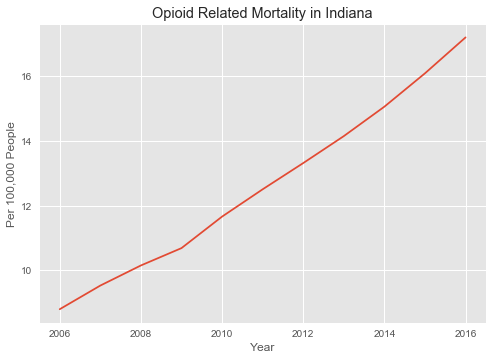

In [47]:
plt.clf()
plt.plot(tiny_year, annual_mortality)
plt.xlabel('Year')
plt.ylabel('Per 100,000 People')
plt.title('Opioid Related Mortality in Indiana')
plt.show()

Now let's look at some fucking choropleth maps BABY 

In [50]:
import plotly

In [51]:
plotly.version

<module 'plotly.version' from '/Users/mae/anaconda3/lib/python3.6/site-packages/plotly/version.py'>

In [74]:
import plotly.plotly as py
plotly.tools.set_credentials_file(username='middaugh', api_key='8Mr0AldZkf8BpDzGMMQT')
import plotly.graph_objs as go

import pandas as pd

df = pd.read_csv('../clean_data/opioid_data_2006-2016.csv')
df = df[df.year==2012]


for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.05, 'rgb(218,218,235)'],
    [0.1, 'rgb(188,189,220)'],
    [0.15, 'rgb(158,154,200)'],
    [0.2, 'rgb(117,107,177)'],
    [1, 'rgb(84,39,143)']
]

df['text'] = df['state'] + '<br>' + \
    'Opioid rate:' + df['avg_mortality_rate'] + ' <br> Prescription: ' + df['prescription_rate'] \
    + '<br> Year: ' + df['year']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['state_abbrv'],
    z = df['prescription_rate'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Number of Opioid Prescriptions per 100 People")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Opioid Prescription Rate in 2012'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~middaugh/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [54]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Fruit...


References
 - https://plot.ly/python/county-choropleth/
 - The AGC2 Proposal 